# IMDB Movie Data EDA

**Authors:** Franko Ndou, Anthony Brocco

# Overview

IMDB has a SQL database containing vast movie data, this as well as two other CSV files that we have obtained will help us perform an EDA to help solve complex business problems. Our goal is to find the best performing films at the box office currently, and translate our findings into understandable data visualizaitons and recomendations. 

# Business Problem

Universal Pictures is looking to create the next big film, they have a massive budget to find the best directors, actors and business practices that will lead to not only the greatest film of our generation but the largest ROI possible. Our job is to perform an exploratory data analysis on large data sets to help Universal come to a conclusion on what is the best possible way to achieve this goal. 

# Creating the Production team

To make a best-selling film, you need a best-selling production team. We need to find out whos the best director and writer for the job. Actors are redundant as directors often write roles with certain actors in mind. Using data to find out the most successful actor will do nothing to help our production team make the best movie that they can. It is their artistic vision, using those statistics will not help us achieve a higher ROI and may negatively effect the film as well.

## Setting up the workspace

In [12]:
#Importing libraries
import pandas as pd
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings


# Ignores warnings 
warnings.filterwarnings("ignore")

In [2]:
# Creating data frames and establishing connections
budgets = pd.read_csv('../zippedData/movie_budget_cleaned.csv')
gross = pd.read_csv('../zippedData/gross_movie_cleaned.csv')
conn = sqlite3.connect('../zippedData/im.db')

In [17]:
# Finding directors with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN directors AS d ON mr.movie_id = d.movie_id
        JOIN persons AS p ON p.person_id = d.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
    
""", conn).head(10)

,movie,max_averagerating,numvotes
0,Christopher Nolan,8.60,1299334
1,Joss Whedon,8.10,1183655
2,James Gunn,8.10,948394
3,Tim Miller,8.00,820847
4,J.J. Abrams,8.00,784780
5,George Miller,8.10,780910
6,David Fincher,8.10,761592
7,David Yates,8.10,691835
8,Ridley Scott,8.00,680116
9,Éric Toledano,8.50,677343


In [4]:
# Finding writers with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN writers AS w ON mr.movie_id = w.movie_id
        JOIN persons AS p ON p.person_id = w.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
""", conn).head(10)

,movie,max_averagerating,numvotes
0,David S. Goyer,8.4,1387769
1,Bob Kane,8.4,1387769
2,Jonathan Nolan,8.6,1299334
3,Christopher Nolan,8.6,1299334
4,Zak Penn,8.1,1183655
5,Joss Whedon,8.1,1183655
6,Terence Winter,8.2,1035358
7,Jordan Belfort,8.2,1035358
8,Laeta Kalogridis,8.1,1005960
9,Dennis Lehane,8.1,1005960


Observing the data we have, it seems like Christopher Nolan is one of the most critically acclaimed directors currently. He seems to be a fantastics writter as well. His Brother, Jonathan Nolan appears on the list as well. Im sure the two of them collaborate often but we should delve a little deeper into this data and see the box office performance and critical feedback of his movies

In [5]:
# Movies Christopher Nolan has directed
c_nolan_films = pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN directors AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn)
                            
c_nolan_films.head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Dunkirk,"Action,Drama,History",7.9,466580


In [6]:
# Movies Chrisopher Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Man of Steel,"Action,Adventure,Sci-Fi",7.1,647288
4,Dunkirk,"Action,Drama,History",7.9,466580


In [7]:
# Movies that Jonathan Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Jonathan Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,The Dark Knight Rises,"Action,Thriller",8.4,1387769
1,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334


It seems like there is some overlap but not entirely, We should check the ROI of the average Christopher Nolan Film as well as the budget and gross of each film

In [8]:
# Merging dataframes to check for ROI
c_nolan_films = budgets.merge(c_nolan_films)
pd.set_option('display.float_format', '{:.2f}'.format)
c_nolan_films.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI,averagerating,numvotes
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,111.50,37.50,187500000.00,279700367.00,771545121.00,3.13,8.43,1248687.25
std,69.58,23.98,58665719.69,122443157.23,249586963.97,0.79,0.39,572862.16
min,10.00,11.00,150000000.00,188017894.00,499837368.00,2.33,7.90,466580.00
25%,100.75,26.75,157500000.00,189555683.50,624743873.25,2.79,8.28,1091145.50
50%,134.00,35.00,162500000.00,241322237.50,750952008.50,2.99,8.50,1343551.50
75%,144.75,45.75,192500000.00,331466921.00,897753256.25,3.33,8.65,1501093.25
max,168.00,69.00,275000000.00,448139099.00,1084439099.00,4.22,8.80,1841066.00


The tables tell us that his films tend to have a massive return on investment. We can assume that if he was given a large budget, he would be able to make the best out of it. However its better to be confident than to assume.

- The average Christopher Nolan film has a budget of $162,500,000.


- The average Christopher Nolan film has a worldwide gross of $750,952,008

- The average Christopher Nolan film has a ROI of 3.13

This tells us a decent amount about what his films are capable of however its better to do a confidence test and truely see if hes worth betting on.

## Hypothesis testing

By simply looking at this data, we can come to the assumption that Christopher Nolan is a great director however its better to see how confident we can be in this hypothesis rather than making assumptions on what we can see through visualizations. Mathmatically we can *prove* or disprove this hypothesis that Christopher Nolan will generate a higher ROI than other directors

Lets start with a T-test

In [71]:
# Filtering for high budget blockbuster movies
high_budgets = budgets[budgets['production_budget'] >= 100000000]
high_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,domestic_gross_in_mill,production_budget_in_mill,domestic_net_in_mill,Return_on_Investment,day_of_the_week
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.53,760.51,425.00,335.51,78.94,Friday
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55,241.06,410.60,-169.54,-41.29,Friday
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.57,42.76,350.00,-307.24,-87.78,Friday
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24,459.01,330.60,128.41,38.84,Friday
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.15,620.18,317.00,303.18,95.64,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,2,2014-04-18,Transcendence,100000000,23022309,103039258,0.03,23.02,100.00,-76.98,-76.98,Friday
402,402,3,2005-02-18,Son of the Mask,100000000,17018422,59918422,-0.40,17.02,100.00,-82.98,-82.98,Friday
403,403,4,2018-12-14,Mortal Engines,100000000,15951040,85287417,-0.15,15.95,100.00,-84.05,-84.05,Friday
404,404,5,2002-08-16,The Adventures of Pluto Nash,100000000,4411102,7094995,-0.93,4.41,100.00,-95.59,-95.59,Friday


In [10]:
#Finding population mean
high_budgets.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI
count,406.00,406.00,406.00,406.00,406.00,406.00
mean,202.50,49.81,152305665.02,174366169.63,483197207.32,2.09
std,117.35,29.24,48914611.34,132206439.21,357422680.04,1.84
min,0.00,1.00,100000000.00,0.00,0.00,-1.00
25%,101.25,24.25,115000000.00,83430704.00,237171424.75,0.76
50%,202.50,50.00,144500000.00,139389358.00,382914758.00,1.75
75%,303.75,75.00,175000000.00,227172569.50,651342567.75,3.15
max,405.00,100.00,425000000.00,936662225.00,2776345279.00,10.04


In [11]:
# Performing T test
stats.ttest_1samp(c_nolan_films['ROI'], 2.09)

Ttest_1sampResult(statistic=2.6434584949923483, pvalue=0.07742616568691908)

We can confidently say there is a 92% chance that Christopher Nolan films will out perform any other director

If possible we should most definitely employee him as the director and writer of our film, should he want to work with his brother that would be entirely acceptable as well due to his own success within the industry.

# Best time to release films

In [40]:
# Creating new column day of the week
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['day_of_the_week'] = budgets['release_date'].dt.strftime("%A")

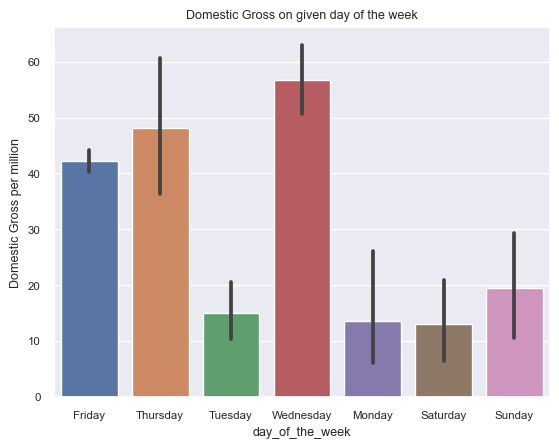

In [70]:
# Creating X and Y
height = budgets['domestic_gross_in_mill']
bars = budgets['day_of_the_week']
sns.set(font_scale=0.75)

# Create bars
sns.barplot(x = 'day_of_the_week', y = 'domestic_gross_in_mill', data = budgets)

# Show graphic
plt.ylabel('Domestic Gross per million')
plt.title('Domestic Gross on given day of the week')
plt.show()

It appears that Wednesday is the optimal day for us to release our movie, and this choice is supported by a significant margin. We should aim to release it during a wednesday or thursday if possible.

We should also check which Month has the highest domestic gross.